In [17]:
using Distributions, Plots

다음의 분포를 따르는 

- $f(x; \theta) = \theta \exp (-x\theta )I(x>0)$

모집단으로부터 랜덤표본 $X_1,\dots,X_n$을 이용하여 $\theta$에 대한 신뢰구간을 구하고, 다음 가설 

- $H_0: \theta = \theta_0$ vs $H_1:\theta \neq \theta_0$

을 검정하고자 한다. 다음에 답하라. 

**(a)** $\theta$에 대한 적절한 추축변량을 구하고, 해당 추축변량의 분포를 명시하라. 

(풀이)

추축변량은 $2n\bar{X}\theta$ 이며 분포는 자유도가 $2n$인 카이제곱분포를 따름. 왜냐하면 

- $X_1 \sim \text{Exp}$ with mean $1/\theta$
- $2X_1\theta \sim \text{Exp}$ with mean $2$
- $2n\bar{X}\theta \sim \chi^2(2n)$ (왜? 평균이2인 지수분포를 $n$번 더하면 자유도가 $2n$인 카이제곱분포가 되므로. --> [참고](https://guebin.github.io/SC2022/0419.html))

이기 떄문에.

(시뮬레이션) 

In [25]:
n = 10
θ = 2
pivotal_variable = [mean(rand(Exponential(1/2),n))*2*n*θ for i in 1:140000]
# pivotal_variable = 추축변량

140000-element Vector{Float64}:
 19.866862184254465
 17.492982610528998
 13.463211578260314
 19.472994478042697
 13.424495255444352
 21.744281289967418
 22.929701779207697
 13.561641745647645
 25.277641996704048
 16.566359730027052
 19.550767074240074
  9.914621718787568
 11.857966801675106
  ⋮
 38.05226144210052
 17.120691971399836
 21.66831336505733
 26.476356317147957
 21.930886178263727
 18.33570158249295
 22.39822061516168
 27.42899896779973
 14.770009603430982
 13.776401174299512
 21.511825086436673
 21.867878699644073

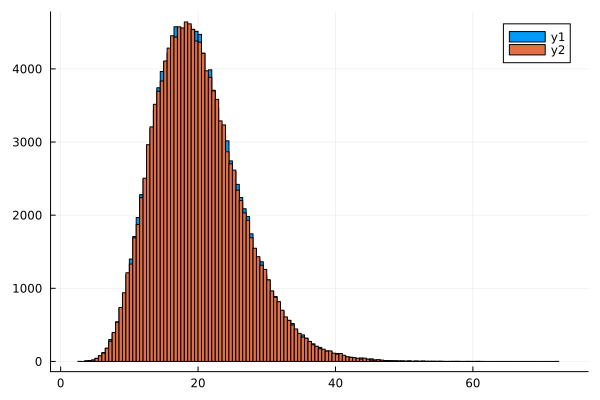

In [26]:
histogram(pivotal_variable)
histogram!(rand(Chisq(2*n),140000))

- 추축변량은 자유도 $2n$인 카이제곱분포를 따름 

**(b)** $\theta$에 대한 95% 신뢰구간을 구하라. 

(풀이)

$P\left(\chi^2_{0.025}(2n) \leq 2n\bar{X}\theta \leq \chi^2_{0.975}(2n) \right) =0.95$ 

Thus the CI of $\theta$: $\left(\frac{\chi^2_{0.025}(2n)}{2n\bar{X}},\frac{\chi^2_{0.975}(2n)}{2n\bar{X}} \right)$

(시뮬레이션)

In [66]:
l = quantile(Chisq(2*n),0.025) ./ (pivotal_variable./θ)
u = quantile(Chisq(2*n),0.975) ./ (pivotal_variable./θ)
[l[i]<θ<u[i] for i in 1:140000] |> mean

0.95035

**(c)** $P(X>1)$에 대한 95% 신뢰구간 

(풀이)

$P(X>1) = \int_{1}^{\infty}\theta \exp(-x\theta)dx =\left[e^{-x\theta} \right]_1^{\infty}=e^{-\theta}$


Thus the CI of $P(X>1)$: $\left(\exp\big(-\frac{\chi^2_{0.975}(2n)}{2n\bar{X}}\big),\exp\big(-\frac{\chi^2_{0.025}(2n)}{2n\bar{X}}\big) \right)$

(시뮬레이션) 

검토1: $P(X>1)=E[I(X>1)]=e^{-\theta}$ 임을 검토 

In [71]:
exp(-θ)

0.1353352832366127

In [76]:
mean(rand(Exponential(1/2),1000000) .> 1)

0.135678

검토2: 신뢰구간 

In [77]:
u2 = exp.(-l)
l2 = exp.(-u)
[l2[i]<exp(-θ)<u2[i] for i in 1:140000] |> mean

0.95035

**(d)** 

$\Omega = \{\theta: \theta>0\}$, $\Omega_0 =\{2\}$

**(e)** $\theta$의 가능도 함수를 기술하시오 

(풀이)

$L(\theta)=\theta^n\exp(-\theta n\bar{x})$

**(f)** $\theta$의 $\Omega$에서의 최대가능도 추정량과 $\Omega_0$에서의 최대가능도 추정량을 구하시오 

(풀이)

$\hat{\theta}^{\Omega}=1/\bar{x}$, $\hat{\theta}^{\Omega_0}=\theta_0$

**(g)** 일반화 가능도 비^[이게 뭐지..?] $\Lambda$를 구하시오. 

(풀이)

$\frac{L\big(\hat{\theta}^{\Omega}\big)}{L\big(\hat{\theta}^{\Omega_0}\big)}=\frac{1/\bar{x}^n\exp(-n)}{\theta_0^n\exp(-\theta_0n\bar{x})}$

**(h)** 유의수준 $\alpha$의 가능도비 검정법의 기각역을 $\chi^2$의 분위수를 사용하여 표현하시오.

(풀이)